# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2 
my_eth = 5.3 

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
import json
# Fetch current BTC price
# YOUR CODE HERE!
btc_data = requests.get(btc_url)
btc_json = btc_data.json()
print(json.dumps(btc_json, indent = 4))
btc_value = btc_json['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
# YOUR CODE HERE!]
eth_data = requests.get(eth_url)
eth_json = eth_data.json()
print(json.dumps(eth_json, indent = 4))
eth_value = eth_json['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_value
my_eth_value = my_eth * eth_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18592106,
            "total_supply": 18592106,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 35385.0,
                    "volume_24h": 68181740480,
                    "market_cap": 657889000253,
                    "percentage_change_1h": -1.42136170205291,
                    "percentage_change_24h": 13.6739785456968,
                    "percentage_change_7d": 29.0282191505942,
                    "percent_change_1h": -1.42136170205291,
                    "percent_change_24h": 13.6739785456968,
                    "percent_change_7d": 29.0282191505942
                }
            },
            "last_updated": 1609910999
        }
    },
    "metadata": {
        "timestamp": 1609910999,
        "num_cryptoc

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
# YOUR CODE HERE!
portfolio_shares = [200, 50]

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

#Confirm APIs
type(alpaca_api_key)
type(alpaca_secret_key)

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


In [8]:
# Format current date as ISO format
# YOUR CODE HERE!
current_date = pd.Timestamp('2020-12-31', tz = 'America/New_York').isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_tickers = alpaca.get_barset(
    tickers, 
    timeframe, 
    start = current_date, 
    end = current_date
).df 

# Preview DataFrame
# YOUR CODE HERE!
df_tickers.head()

AGG                                     SPY  \
                             open    high     low  close   volume    open   
time                                                                        
2020-12-31 00:00:00-05:00  118.18  118.24  118.12  118.2  4325026  371.78   

                                                              
                             high      low   close    volume  
time                                                          
2020-12-31 00:00:00-05:00  374.66  371.232  373.85  52720911

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = df_tickers.iloc[0]['AGG']['close']
spy_close_price = df_tickers.iloc[0]['SPY']['close']
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.2
Current SPY closing price: $373.85


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy = portfolio_shares[1]
my_agg = portfolio_shares[0]

my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price 
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18692.50
The current value of your 200 AGG shares is $23640.00


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000 
# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(
    {'amount': [my_btc_value +  my_eth_value, my_spy_value + my_agg_value]
    },
    index = ['cryto', 'shares']
)
# Display savings DataFrame
display(df_savings)

amount
cryto   48387.824
shares  42332.500

<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

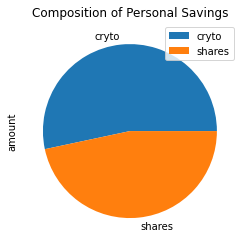

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!

df_savings.plot.pie(y = 'amount', title = 'Composition of Personal Savings')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = df_savings.iloc[0].sum()

# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund: 
    print(f"""
    Your total savings is ${total_savings} which is greater than your emergency fund ${emergency_fund} by ${round(abs(total_savings - emergency_fund), 2)}."""
    )
elif total_savings <= emergency_fund: 
    print(f"""
    Your total savings is ${total_savings}, which is less than your emergency fund ${emergency_fund} by ${round(abs(total_savings -emergency_fund), 2)}."""
    )


    


    Your total savings is $48387.824 which is greater than your emergency fund $36000 by $12387.82.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = alpaca.get_barset(
    tickers, 
    timeframe, 
    start = start_date, 
    end = end_date
).df
# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
time                                                          
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_simulation_30YR = MCSimulation(
    portfolio_data = df_stock_data, 
    weights = [0.4, 0.6],
    num_simulation = 500, 
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_simulation_30YR.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_simulation_30YR.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1         2         3         4          5         6    \
0      1.000000   1.000000  1.000000  1.000000  1.000000   1.000000  1.000000   
1      1.007209   0.992312  1.010787  1.015231  1.004647   1.014033  0.990218   
2      0.996227   0.996763  1.013432  1.017984  1.002263   1.019402  0.998885   
3      0.999305   0.981182  1.010742  1.024931  1.012712   1.024246  0.993328   
4      1.019184   0.985622  1.004363  1.024021  1.012802   1.034306  0.989329   
...         ...        ...       ...       ...       ...        ...       ...   
7556  14.066515  18.295083  5.105132  8.602600  6.680302  11.939895  4.942792   
7557  14.045363  18.187341  5.121352  8.575569  6.617574  11.989122  4.988950   
7558  13.908502  18.313947  5.080041  8.563400  6.593230  12.140001  4.985549   
7559  14.000710  18.325440  5.060039  8.491270  6.473314  12.284192  4.997447   
7560  13.943110  18.435627  5.066332  8.480098  6.349604  12.298519  4.998738   

           7          8          9    ...        490        491       492  \
0     1.000000   1.000000   1.000000  ...   1.000000   1.000000  1.000000   
1     0.997823   1.009069   0.999898  ...   1.010891   0.990209  1.002411   
2     0.999602   1.013577   1.002513  ...   1.021806   0.993528  0.995354   
3     0.999555   1.010604   0.997046  ...   1.025543   1.004735  0.992849   
4     1.003701   1.028679   0.986466  ...   1.016188   0.993067  0.998626   
...        ...        ...        ...  ...        ...        ...       ...   
7556  9.321130  11.333204  13.310010  ...  12.238258  32.974229  5.047600   
7557  9.304378  11.460136  13.259832  ...  12.218819  32.738303  5.078217   
7558  9.349094  11.431542  13.368267  ...  12.266407  32.960011  5.067492   
7559  9.457009  11.518629  13.200291  ...  12.212823  32.814209  4.986879   
7560  9.394538  11.466953  13.159505  ...  12.148878  32.739030  4.976783   

            493       494       495       496       497        498       499  
0      1.000000  1.000000  1.000000  1.000000  1.000000   1.000000  1.000000  
1      0.998897  0.997379  1.012318  1.011366  1.007476   1.010067  0.997490  
2      1.000829  0.998822  1.018608  1.009740  1.014569   1.007539  0.991598  
3      1.007446  0.993921  1.007181  1.016444  1.012990   1.007499  0.997716  
4      1.018191  0.990884  1.011092  1.022600  1.007840   1.013464  1.003318  
...         ...       ...       ...       ...       ...        ...       ...  
7556  12.274442  4.295798  3.706683  9.783688  5.784710  15.849384  4.691329  
7557  12.333468  4.296205  3.705638  9.683771  5.730834  15.852670  4.675066  
7558  12.277341  4.288704  3.658554  9.541871  5.725009  15.694391  4.670359  
7559  12.312503  4.294177  3.664968  9.447107  5.676116  15.734885  4.656534  
7560  12.365336  4.294860  3.696253  9.420047  5.632187  15.636904  4.612974  

[7561 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

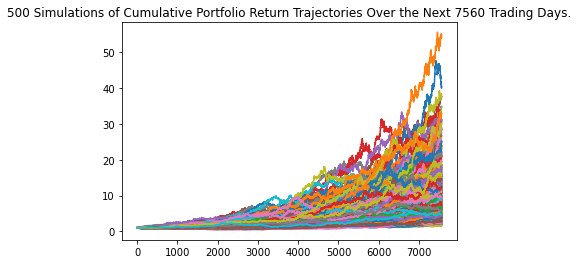

In [22]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_simulation_30YR.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

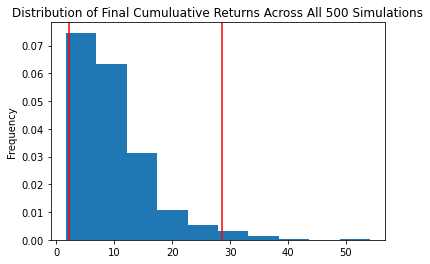

In [21]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_simulation_30YR.plot_distribution()

### Retirement Analysis

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
table30YR = MC_simulation_30YR.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(table30YR)

count           500.000000
mean              9.910755
std               6.790691
min               1.630400
25%               5.100012
50%               8.285842
75%              12.506811
max              54.158719
95% CI Lower      2.172337
95% CI Upper     28.517462
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [27]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(table30YR[8] * initial_investment, 2)
ci_upper = round(table30YR[9] * initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $43446.73 and $570349.24


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [28]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(table30YR[8] * initial_investment, 2)
ci_upper = round(table30YR[9] * initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $65170.1 and $855523.86


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_simulation_5YR_RiskOff = MCSimulation(
    portfolio_data = df_stock_data, 
    weights = [0.6, 0.4],
    num_simulation = 500, 
    num_trading_days = 252*5
  )
    
MC_simulation_5YR_RiskOn = MCSimulation(
    portfolio_data = df_stock_data, 
    weights = [0.05, 0.95],
    num_simulation = 500, 
    num_trading_days = 252*5
)

In [31]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_simulation_5YR_RiskOff.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.000510  0.988247  0.998957  0.998298  1.002961  0.997402  0.999069   
2     1.001227  0.987373  1.002990  0.996802  1.003998  0.996090  1.007024   
3     0.997031  0.994450  1.000932  1.004209  1.004303  0.999737  1.001691   
4     0.996194  0.983598  1.007157  1.002995  1.009864  1.001553  1.005102   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.142977  1.131640  1.478210  1.572989  1.492919  1.083180  0.914853   
1257  1.149524  1.132426  1.472669  1.590274  1.483095  1.094140  0.919435   
1258  1.149811  1.146110  1.468180  1.587594  1.479777  1.087108  0.922364   
1259  1.138233  1.155123  1.474649  1.582240  1.480963  1.092524  0.919285   
1260  1.143615  1.163963  1.471563  1.591748  1.491466  1.103106  0.921775   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.002153  1.001354  0.994364  ...  1.004143  0.998225  1.001585   
2     0.996788  0.999722  0.995818  ...  1.000272  1.003378  1.002284   
3     0.997741  0.998525  0.999475  ...  1.005907  1.003859  1.003016   
4     0.996747  0.999395  0.991210  ...  1.008351  1.007498  1.003942   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.098278  1.244745  1.540487  ...  1.260381  1.180241  1.601261   
1257  1.107282  1.239853  1.541256  ...  1.253211  1.183745  1.607921   
1258  1.110307  1.240207  1.538285  ...  1.256200  1.165431  1.614512   
1259  1.109849  1.239592  1.536980  ...  1.256341  1.171592  1.604861   
1260  1.099933  1.239091  1.554045  ...  1.244819  1.183465  1.606951   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.002368  1.003633  0.994495  0.997864  0.993298  1.001497  0.995648  
2     1.005126  1.007214  0.998289  1.001223  0.994479  1.002925  1.001032  
3     1.002127  1.010848  0.996212  1.003495  0.991067  1.000900  0.999114  
4     0.999407  1.005364  0.998297  1.004856  0.987382  0.996536  0.997043  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.488405  1.700453  1.270484  1.430161  1.158543  1.093366  1.225087  
1257  1.483977  1.690730  1.280558  1.439270  1.153928  1.089272  1.224896  
1258  1.482673  1.694982  1.277763  1.427375  1.150573  1.082273  1.232058  
1259  1.497666  1.698661  1.284525  1.419719  1.150636  1.079210  1.222881  
1260  1.506060  1.699716  1.277739  1.422656  1.150884  1.080698  1.228914  

[1261 rows x 500 columns]

In [32]:
MC_simulation_5YR_RiskOn.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.996423  0.982742  1.009503  1.001573  0.980225  0.995413  1.001628   
2     0.986012  0.995609  1.018440  0.998787  0.988505  0.995294  1.006835   
3     0.981517  1.017456  1.002607  0.987120  0.986520  1.000800  1.017095   
4     0.985321  1.025853  0.986478  0.990441  0.963080  0.985327  1.033449   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.095393  2.361328  0.913660  1.116341  1.477845  2.812902  1.219206   
1257  1.096796  2.316830  0.908026  1.120042  1.459371  2.852121  1.206788   
1258  1.118113  2.313295  0.917752  1.112094  1.466557  2.809857  1.198133   
1259  1.121075  2.322012  0.925928  1.116144  1.460308  2.762739  1.214053   
1260  1.144301  2.336740  0.941586  1.133525  1.474546  2.714981  1.214426   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.992857  0.996426  1.000529  ...  0.994860  1.006713  1.004824   
2     0.997213  1.000011  0.982972  ...  0.977422  1.003729  1.011241   
3     1.010791  0.992456  0.985958  ...  0.980821  0.992728  1.032169   
4     1.007193  1.001476  0.998978  ...  0.963819  0.976711  1.046103   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.102847  3.432060  0.838178  ...  0.983067  2.034148  2.087117   
1257  1.109521  3.448777  0.833603  ...  0.984242  2.032073  2.090510   
1258  1.127405  3.483606  0.844390  ...  0.961808  2.021224  2.117193   
1259  1.135081  3.451329  0.850643  ...  0.968079  2.059116  2.126440   
1260  1.131981  3.415964  0.849911  ...  0.965074  2.057164  2.112502   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.006811  0.993540  1.003602  1.009679  0.986401  0.995037  0.996769  
2     1.013528  0.999022  0.999036  0.999928  0.984447  0.986728  1.005096  
3     0.998720  1.009814  1.002649  0.994748  0.982082  0.983855  1.003942  
4     1.011439  1.022085  0.997428  0.991803  0.992212  1.008742  0.994091  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.158547  1.677298  1.855737  0.826431  1.997216  1.044327  1.340416  
1257  1.163067  1.646075  1.854097  0.825949  1.959291  1.053461  1.357272  
1258  1.152391  1.652982  1.857496  0.820493  1.960630  1.036567  1.334221  
1259  1.141772  1.651781  1.922269  0.817076  1.954869  1.044606  1.305659  
1260  1.161974  1.662778  1.925662  0.819359  1.997539  1.049133  1.339976  

[1261 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

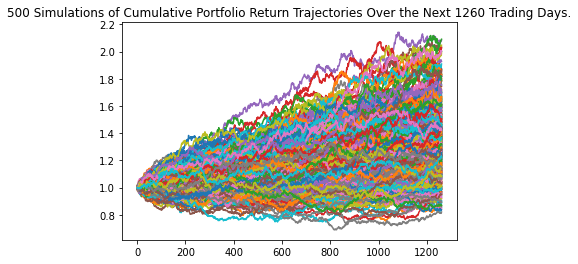

In [33]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_simulation_5YR_RiskOff.plot_simulation()

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

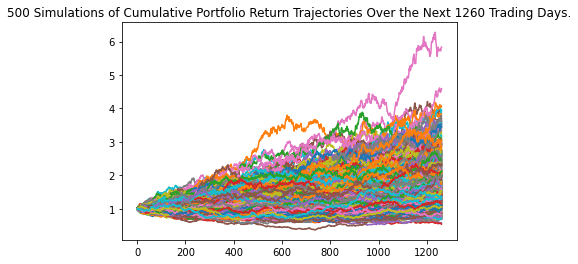

In [34]:
# Plot simulation outcomes
MC_simulation_5YR_RiskOn.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

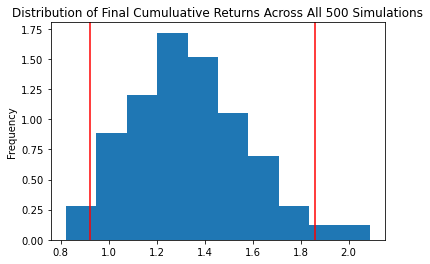

In [35]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_simulation_5YR_RiskOff.plot_distribution()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

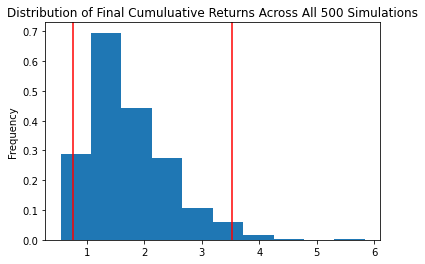

In [36]:
# Plot probability distribution and confidence intervals
MC_simulation_5YR_RiskOn.plot_distribution()

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
table5YR_RiskOff = MC_simulation_5YR_RiskOff.summarize_cumulative_return()
table5YR_RiskOn = MC_simulation_5YR_RiskOn.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(table5YR_RiskOff)
print('\n')
print(table5YR_RiskOn)

count           500.000000
mean              1.333498
std               0.244881
min               0.820855
25%               1.149685
50%               1.315383
75%               1.486324
max               2.090043
95% CI Lower      0.920365
95% CI Upper      1.861227
Name: 1260, dtype: float64


count           500.000000
mean              1.728232
std               0.721753
min               0.543120
25%               1.210953
50%               1.558370
75%               2.112185
max               5.835452
95% CI Lower      0.751742
95% CI Upper      3.528105
Name: 1260, dtype: float64


In [40]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_short = 25000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five_RiskOff = round(initial_investment_short * table5YR_RiskOff[8], 2)
ci_upper_five_RiskOff = round(initial_investment_short * table5YR_RiskOff[9], 2)

ci_lower_five_RiskOn = round(initial_investment_short * table5YR_RiskOn[8], 2)
ci_upper_five_RiskOn = round(initial_investment_short * table5YR_RiskOn[9], 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_short} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five_RiskOff } and ${ci_upper_five_RiskOff} with the 'Risk Off' Portfolio")

print('\n')

print(f"There is a 95% chance that an initial investment of ${initial_investment_short} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five_RiskOn} and ${ci_upper_five_RiskOn} with the 'Risk On' Portfolio")

There is a 95% chance that an initial investment of $25000 in the portfolio over the next 5 years will end within in the range of $23009.11 and $46530.68 with the 'Risk Off' Portfolio


There is a 95% chance that an initial investment of $25000 in the portfolio over the next 5 years will end within in the range of $18793.54 and $88202.62 with the 'Risk On' Portfolio


### Ten Years Retirement Option

In [41]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_simulation_10YR_RiskOn = MCSimulation(
    portfolio_data = df_stock_data, 
    weights = [0.2, 0.8],
    num_simulation = 500, 
    num_trading_days = 252*10
)

In [42]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_simulation_10YR_RiskOn.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.005971  1.009287  0.992406  1.010196  0.989948  1.015646  1.017363   
2     0.999685  1.008911  0.994672  1.026485  0.987726  1.013429  1.019107   
3     0.994391  0.981474  0.990659  1.032554  0.990379  1.024619  1.001725   
4     1.014881  0.967331  0.994428  1.034708  0.985736  1.040279  1.021160   
...        ...       ...       ...       ...       ...       ...       ...   
2516  1.988226  3.860664  1.915734  2.280524  2.690392  1.448551  2.591704   
2517  1.976441  3.808903  1.919344  2.278605  2.655461  1.450932  2.573879   
2518  1.978551  3.776889  1.918241  2.291731  2.684143  1.460835  2.587475   
2519  1.966965  3.785211  1.897768  2.297081  2.651353  1.442676  2.575591   
2520  1.971437  3.808506  1.893990  2.303848  2.632390  1.455944  2.525427   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.016005  0.990619  1.005497  ...  1.007015  0.998695  0.987112   
2     1.011508  0.995050  1.020247  ...  1.015544  0.992220  0.998226   
3     1.011385  0.980179  1.040028  ...  1.023755  0.989522  0.999954   
4     1.005768  0.981355  1.033734  ...  1.017280  0.972697  0.995561   
...        ...       ...       ...  ...       ...       ...       ...   
2516  3.049332  3.858160  0.748546  ...  3.136062  5.719387  1.842320   
2517  3.065236  3.894730  0.752559  ...  3.129766  5.681320  1.863494   
2518  3.000418  3.904037  0.746503  ...  3.196294  5.793238  1.894794   
2519  3.038436  3.925540  0.734370  ...  3.217353  5.773845  1.895622   
2520  3.071964  3.874727  0.728069  ...  3.263509  5.805631  1.883226   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.012298  0.985562  0.992790  1.005742  0.990319  1.008186  1.012851  
2     1.034616  0.979262  0.997678  0.995983  0.998971  1.016181  1.024185  
3     1.035545  0.992339  0.992334  1.005828  1.018255  1.007370  1.015115  
4     1.042699  0.992717  1.019016  0.992781  1.022363  1.017996  1.009421  
...        ...       ...       ...       ...       ...       ...       ...  
2516  3.794578  1.561421  1.362510  3.202193  4.373274  3.193054  0.992071  
2517  3.733647  1.550576  1.360055  3.199726  4.408015  3.168473  1.002690  
2518  3.725556  1.569278  1.369581  3.152106  4.368729  3.163798  1.008356  
2519  3.667109  1.589755  1.369455  3.206091  4.454075  3.141648  1.013973  
2520  3.682846  1.603356  1.353027  3.237660  4.406284  3.146568  1.034053  

[2521 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

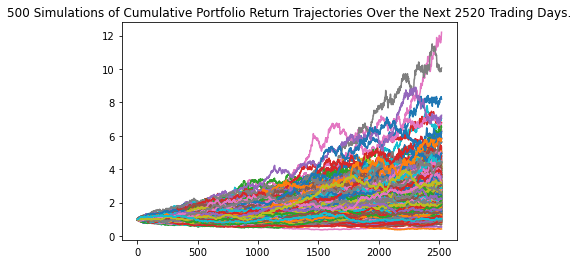

In [43]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_simulation_10YR_RiskOn.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

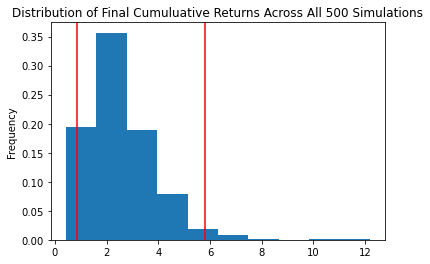

In [44]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_simulation_10YR_RiskOn.plot_distribution()


In [45]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
table10YR = MC_simulation_10YR_RiskOn.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(table10YR)

count           500.000000
mean              2.584206
std               1.339671
min               0.419842
25%               1.679210
50%               2.323849
75%               3.173950
max              12.197043
95% CI Lower      0.862287
95% CI Upper      5.818191
Name: 2520, dtype: float64


In [46]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_intermediate = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(table10YR[8]*initial_investment, 2)
ci_upper_ten = round(table10YR[9]*initial_investment, 2)
# Print results
#Used 30 Years instead of 10 Years as Monte Carlo simulation was of a 60/40 'SPY'/'AGG' portfolio for 30 Years. 
print(f"There is a 95% chance that an initial investment of ${initial_investment_intermediate} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $25868.62 and $174545.73
